In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from utils_reconstruction import image_similarity as imsim
import tifffile

In [2]:
## load reconstruction .npy files
num_neurons = [7863, 7908, 8202, 7939, 8122]
mouse_names = [
    "dynamic29515-10-12-Video-9b4f6a1a067fe51e15306b9628efea20",
    "dynamic29623-4-9-Video-9b4f6a1a067fe51e15306b9628efea20",
    "dynamic29647-19-8-Video-9b4f6a1a067fe51e15306b9628efea20",
    "dynamic29712-5-9-Video-9b4f6a1a067fe51e15306b9628efea20",
    "dynamic29755-2-8-Video-9b4f6a1a067fe51e15306b9628efea20",
]

max_num_neurons = np.max(num_neurons)
model_list = np.array([0,1,2,3,4,5,6]) # 1,2,3,4,5,6 # 0 held out!
mice = range(0,3)
reps = np.array([0,1,2,3,4])# range(0,5)
spatial_length_constant = range(0,7)
temporal_length_constant = range(0,7)
eval_frame_skip = 30 # default 30
mask_th = 1

video_gt=np.nan*np.ones((len(mice),len(reps)*2,len(spatial_length_constant),len(temporal_length_constant),60,36,64))
video_pred=np.nan*np.ones((model_list.size,len(mice),len(reps)*2,len(spatial_length_constant),len(temporal_length_constant),60,36,64))
responses_pred_gt=np.nan*np.ones((model_list.size,len(mice),len(reps)*2,len(spatial_length_constant),len(temporal_length_constant),max_num_neurons,60))
responses_pred_recon=np.nan*np.ones((model_list.size,len(mice),len(reps)*2,len(spatial_length_constant),len(temporal_length_constant),max_num_neurons,60))
mask=np.nan*np.ones((len(mice),36,64))


for model_n in model_list:
    for mouse in mice:
        for rep in range(0,len(reps)):#reps:
            for spatial_n in spatial_length_constant:
                for temporal_n in temporal_length_constant:
                        
                    datapath=f'../reconstructions/modelfold{model_n}_round4_Gausnoise/reconstruction_summary_m{mouse}_r{reps[rep]}s{spatial_n}t{temporal_n}.npy' 
                    print(datapath)
                    data = np.load(datapath, allow_pickle=True).item()
                    if model_n==model_list[0]:
                        video_gt[mouse,rep,spatial_n,temporal_n] = data['video_gt']

                    video_pred[model_n-1,mouse,rep,spatial_n,temporal_n] = data['video_pred']
                    mask[mouse-1] = data['mask'][14:14+36,:]
                    responses_pred_gt[model_n-1,mouse,rep,spatial_n,temporal_n,0:num_neurons[mouse],:] = data['responses_predicted_gt']
                    responses_pred_recon[model_n-1,mouse-1,rep,spatial_n,temporal_n,0:num_neurons[mouse],:] = data['responses_predicted_full']
                    
                    # add phase inverted stimuli as additional reps
                    datapath=f'../reconstructions/modelfold{model_n}_round5_Gausnoise_PhaseInverted/reconstruction_summary_m{mouse}_r{reps[rep]}s{spatial_n}t{temporal_n}.npy' 
                    print(datapath)
                    data = np.load(datapath, allow_pickle=True).item()
                    if model_n==model_list[0]:
                        video_gt[mouse,rep+len(reps),spatial_n,temporal_n] = data['video_gt']

                    video_pred[model_n-1,mouse,rep+len(reps),spatial_n,temporal_n] = data['video_pred']
                    mask[mouse-1] = data['mask'][14:14+36,:]
                    responses_pred_gt[model_n-1,mouse,rep+len(reps),spatial_n,temporal_n,0:num_neurons[mouse],:] = data['responses_predicted_gt']
                    responses_pred_recon[model_n-1,mouse-1,rep+len(reps),spatial_n,temporal_n,0:num_neurons[mouse],:] = data['responses_predicted_full']                    

reps = np.array([0,1,2,3,4,5,6,7,8,9])# range(0,5)

# remove eval grace period
video_gt = video_gt[:,:,:,:,eval_frame_skip:,:,:]
video_pred = video_pred[:,:,:,:,:,eval_frame_skip:,:,:]
responses_pred_gt = responses_pred_gt[:,:,:,:,:,:,eval_frame_skip:]
responses_pred_recon = responses_pred_recon[:,:,:,:,:,:,eval_frame_skip:]

print('video_gt: ', video_gt.shape, video_gt.min(), video_gt.max())     
print('video_pred: ', video_pred.shape, video_pred.min(), video_pred.max())
print('mask: ', mask.shape, mask.min(), mask.max())

video_pred = np.clip(video_pred, 0, 255) # not sure i need this... but just in case

video_pred_Amean_all = np.nanmean(video_pred, axis=0) # mean across models, no smoothing

../reconstructions/modelfold0_round4_Gausnoise/reconstruction_summary_m0_r0s0t0.npy
../reconstructions/modelfold0_round5_Gausnoise_PhaseInverted/reconstruction_summary_m0_r0s0t0.npy
../reconstructions/modelfold0_round4_Gausnoise/reconstruction_summary_m0_r0s0t1.npy
../reconstructions/modelfold0_round5_Gausnoise_PhaseInverted/reconstruction_summary_m0_r0s0t1.npy
../reconstructions/modelfold0_round4_Gausnoise/reconstruction_summary_m0_r0s0t2.npy
../reconstructions/modelfold0_round5_Gausnoise_PhaseInverted/reconstruction_summary_m0_r0s0t2.npy
../reconstructions/modelfold0_round4_Gausnoise/reconstruction_summary_m0_r0s0t3.npy
../reconstructions/modelfold0_round5_Gausnoise_PhaseInverted/reconstruction_summary_m0_r0s0t3.npy
../reconstructions/modelfold0_round4_Gausnoise/reconstruction_summary_m0_r0s0t4.npy
../reconstructions/modelfold0_round5_Gausnoise_PhaseInverted/reconstruction_summary_m0_r0s0t4.npy
../reconstructions/modelfold0_round4_Gausnoise/reconstruction_summary_m0_r0s0t5.npy
../rec

In [3]:
# correlation between video_gt and video_pred for each rep, spatial and temporal frequency
print('video_gt: ', video_gt.shape, video_gt.min(), video_gt.max())
print('video_pred_Amean_all: ', video_pred_Amean_all.shape, video_pred_Amean_all.min(), video_pred_Amean_all.max())

all_corr = np.zeros((len(mice),len(reps),len(spatial_length_constant),len(temporal_length_constant)))
all_corr_randvid = np.zeros((len(mice),len(reps),len(spatial_length_constant),len(temporal_length_constant),len(reps)-1))

for mouse in mice:
    for rep in range(0,len(reps)):
        for spatial_n in spatial_length_constant:
            for temporal_n in temporal_length_constant:
                all_corr[mouse-1,rep,spatial_n,temporal_n] = imsim.reconstruction_video_corr(video_gt[mouse-1,rep,spatial_n,temporal_n],
                                                                                           video_pred_Amean_all[mouse-1,rep,spatial_n,temporal_n],
                                                                                           np.where(mask[mouse-1] >= mask_th,1,0))

                i = -1
                for randrep in range(0,len(reps)):
                    if randrep != rep:
                        i+=1
                        all_corr_randvid[mouse-1,rep,spatial_n,temporal_n,i] = imsim.reconstruction_video_corr(video_gt[mouse-1,randrep,spatial_n,temporal_n],
                                                                                                video_pred_Amean_all[mouse-1,rep,spatial_n,temporal_n],
                                                                                                np.where(mask[mouse-1] >= mask_th,1,0))
all_corr_randvid = np.nanmean(all_corr_randvid,axis=-1)

# all corr across mice and reps
all_corr = all_corr.reshape((len(mice)*len(reps),len(spatial_length_constant),len(temporal_length_constant)))
all_corr_randvid = all_corr_randvid.reshape((len(mice)*(len(reps)),len(spatial_length_constant),len(temporal_length_constant)))

# mean corr across mice and reps
mean_corr_ensembled = np.nanmean(all_corr, axis=(0))
mean_corr_randvid_ensembled = np.nanmean(all_corr_randvid, axis=(0))
print('mean_corr: ', mean_corr_ensembled.shape)

all_mean_corr = np.zeros((len(model_list),len(mice),len(reps),len(spatial_length_constant),len(temporal_length_constant)))
all_mean_corr_randvid = np.zeros((len(model_list),len(mice),len(reps),len(spatial_length_constant),len(temporal_length_constant),len(reps)-1))

for model_n in model_list:
    for mouse in mice:
        for rep in range(0,len(reps)):
            for spatial_n in spatial_length_constant:
                for temporal_n in temporal_length_constant:
                    all_mean_corr[model_n-1,mouse-1,rep,spatial_n,temporal_n] = imsim.reconstruction_video_corr(video_gt[mouse-1,rep,spatial_n,temporal_n],
                                                                                            video_pred[model_n-1,mouse-1,rep,spatial_n,temporal_n],
                                                                                            np.where(mask[mouse-1] >= mask_th,1,0))
                    i = -1
                    for randrep in range(0,len(reps)):
                        if randrep != rep:
                            i+=1
                            all_mean_corr_randvid[model_n-1,mouse-1,rep,spatial_n,temporal_n,i] = imsim.reconstruction_video_corr(video_gt[mouse-1,randrep,spatial_n,temporal_n],
                                                                                                    video_pred[model_n-1,mouse-1,rep,spatial_n,temporal_n],
                                                                                                    np.where(mask[mouse-1] >= mask_th,1,0))
all_mean_corr_randvid = np.nanmean(all_mean_corr_randvid,axis=-1)

# all corr across mice and reps
all_mean_corr = np.moveaxis(np.moveaxis(all_mean_corr,(1,2),(0,1)).reshape((len(mice)*len(reps),len(model_list),len(spatial_length_constant),len(temporal_length_constant))),(0),(1))
all_mean_corr_randvid = np.moveaxis(np.moveaxis(all_mean_corr_randvid,(1,2),(0,1)).reshape((len(mice)*len(reps),len(model_list),len(spatial_length_constant),len(temporal_length_constant))),(0),(1))
all_mean_corr = np.nanmean(all_mean_corr, axis=(0))
all_mean_corr_randvid = np.nanmean(all_mean_corr_randvid, axis=(0))

mean_corr = np.nanmean(all_mean_corr, axis=(0))

video_gt:  (3, 10, 7, 7, 30, 36, 64) 0.0 255.0
video_pred_Amean_all:  (3, 10, 7, 7, 30, 36, 64) 14.418841661353197 251.81122044154577


mean_corr:  (7, 7)


In [4]:
## stats 

# ttest between all_corr and all_corr_randvid at every spatial and temporal frequency
pass_corr_essembled = np.zeros((len(spatial_length_constant),len(temporal_length_constant)))

for spatial_n in spatial_length_constant:
    for temporal_n in temporal_length_constant:
        pass_corr_essembled[spatial_n,temporal_n] = sp.stats.ttest_rel(all_corr[:,spatial_n,temporal_n],all_corr_randvid[:,spatial_n,temporal_n])[1]       

print('pass_corr_essembled: ', pass_corr_essembled.shape)
print(pass_corr_essembled<0.001)


# test if difference is significant
# ttest between all_corr and all_corr_randvid at every spatial and temporal frequency
pass_corr_essembled = np.zeros((len(spatial_length_constant),len(temporal_length_constant)))

for spatial_n in spatial_length_constant:
    for temporal_n in temporal_length_constant:
        pass_corr_essembled[spatial_n,temporal_n] = sp.stats.ttest_rel(all_corr[:,spatial_n,temporal_n],all_mean_corr[:,spatial_n,temporal_n])[1]       

print('pass_corr_essemble_improvement: ', pass_corr_essembled.shape)
print(pass_corr_essembled<0.001)



pass_corr_essembled:  (7, 7)
[[ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]]
pass_corr_essemble_improvement:  (7, 7)
[[ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]]


In [5]:
# contrast adjust images
# for each movie, take the mean image across all time points, then calculate the mean and std of that image
# normalize the predicted images by subtracting the mean and dividing by the std
mouse_n,trial_n,slc,tlc,frame_n, h_n, w_n = video_gt.shape[0],video_gt.shape[1],video_gt.shape[2],video_gt.shape[3],video_gt.shape[4],video_gt.shape[5],video_gt.shape[6]

expanded_mask = np.expand_dims(np.where(mask>= mask_th,1,np.nan) ,axis=(1,2,3,4)).repeat(trial_n,axis=-6).repeat(slc,axis=-5) .repeat(tlc,axis=-4).repeat(frame_n,axis=-3)

# get target mean and std

video_gt_frame_mean = video_gt * expanded_mask
target_means = np.nanmean(video_gt_frame_mean, axis=(-1,-2,-3))
target_stds = np.nanstd(video_gt_frame_mean, axis=(-1,-2,-3))

# get start mean and std
video_pred_frame_mean = video_pred_Amean_all * expanded_mask
start_means = np.nanmean(video_pred_frame_mean, axis=(-1,-2,-3))
start_stds = np.nanstd(video_pred_frame_mean, axis=(-1,-2,-3))

# expand dims of mean and std in time h and w
target_means = np.expand_dims(target_means,axis=(4,5,6)).repeat(frame_n,axis=-3).repeat(h_n,axis=-2).repeat(w_n,axis=-1)
target_stds = np.expand_dims(target_stds,axis=(4,5,6)).repeat(frame_n,axis=-3).repeat(h_n,axis=-2).repeat(w_n,axis=-1)
start_means = np.expand_dims(start_means,axis=(4,5,6)).repeat(frame_n,axis=-3).repeat(h_n,axis=-2).repeat(w_n,axis=-1)
start_stds = np.expand_dims(start_stds,axis=(4,5,6)).repeat(frame_n,axis=-3).repeat(h_n,axis=-2).repeat(w_n,axis=-1)

# # z-score predicted video
video_pred_zscore = (video_pred_Amean_all - start_means)  / start_stds
video_pred_norm = (video_pred_zscore*target_stds) + target_means
video_pred_norm = np.clip(video_pred_norm, 0, 255)

# reaply mask
video_gt_masked = video_gt * expanded_mask#np.expand_dims(expanded_mask ,axis=(-3)).repeat(frame_n,axis=-3)
video_pred_Amean_all_masked = video_pred_Amean_all * expanded_mask#p.expand_dims(expanded_mask ,axis=(-3)).repeat(frame_n,axis=-3)
video_pred_norm_masked = video_pred_norm * expanded_mask#np.expand_dims(expanded_mask ,axis=(-3)).repeat(frame_n,axis=-3)

video_gt_masked[np.isnan(video_gt_masked)] = 255/2
video_pred_Amean_all_masked[np.isnan(video_pred_Amean_all_masked)] = 255/2
video_pred_norm_masked[np.isnan(video_pred_norm_masked)] = 255/2

h_min, h_max, w_min, w_max:  0 30 14 45
h, w:  30 31
videos_gt_tiled:  (30, 210, 217)
video_gt:  (3, 10, 7, 7, 30, 36, 64)


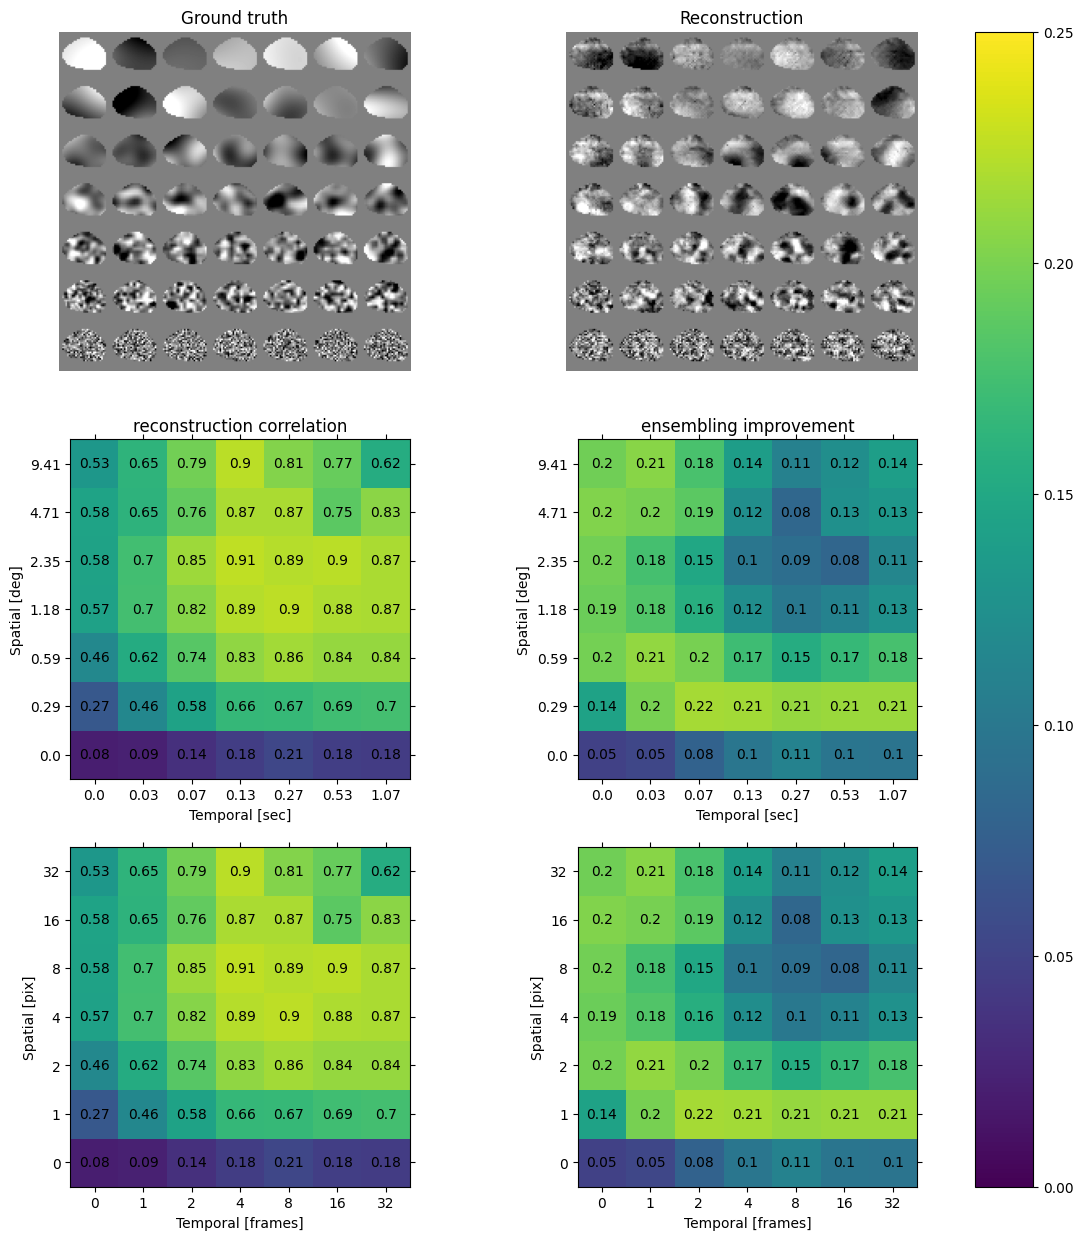

In [6]:
fig, axs = plt.subplots(3,2, figsize=(15,15))

axs[1,0].imshow(mean_corr_ensembled, cmap='viridis', vmin=0, vmax=1)
axs[1,0].invert_yaxis()
axs[1,0].set_xticks(np.arange(7), np.array([0,1,2,4,8,16,32]).__mul__(1/30).round(2).astype(str))
axs[1,0].set_yticks(np.arange(7), np.array([0,1,2,4,8,16,32]).__mul__(1/3.4).round(2).astype(str))
axs[1,0].set_xlabel('Temporal [sec]')
axs[1,0].set_ylabel('Spatial [deg]')
#set axis square
axs[1,0].set_box_aspect(1)
axs[1,0].set_title('reconstruction correlation')
axs[1,0].tick_params(bottom=True, top=True, left=True, right=True)
for i in range(7):
    for j in range(7):
        c = mean_corr_ensembled[j,i]
        axs[1,0].text(i, j, str(round(c, 2)), 
                 va='center', ha='center')

fig.colorbar(axs[1,1].imshow(mean_corr_ensembled-mean_corr, cmap='viridis', vmin=0, vmax=0.25),ax=axs)
axs[1,1].invert_yaxis()
axs[1,1].set_xticks(np.arange(7), np.array([0,1,2,4,8,16,32]).__mul__(1/30).round(2).astype(str))
axs[1,1].set_yticks(np.arange(7), np.array([0,1,2,4,8,16,32]).__mul__(1/3.4).round(2).astype(str))
axs[1,1].set_xlabel('Temporal [sec]')
axs[1,1].set_ylabel('Spatial [deg]')
#set axis square
axs[1,1].set_box_aspect(1)
axs[1,1].set_title('ensembling improvement')
axs[1,1].tick_params(bottom=True, top=True, left=True, right=True)
for i in range(7):
    for j in range(7):
        c = mean_corr_ensembled[j,i]-mean_corr[j,i]
        axs[1,1].text(i, j, str(round(c, 2)), 
                 va='center', ha='center')
        

# now relative to pixels and frames
axs[2,0].imshow(mean_corr_ensembled, cmap='viridis', vmin=0, vmax=1)
axs[2,0].invert_yaxis()
axs[2,0].set_xticks(np.arange(7), ['0','1','2','4','8','16','32'])
axs[2,0].set_yticks(np.arange(7), ['0','1','2','4','8','16','32'])
axs[2,0].set_xlabel('Temporal [frames]')
axs[2,0].set_ylabel('Spatial [pix]')
#set axis square
axs[2,0].set_box_aspect(1)
axs[2,0].tick_params(bottom=True, top=True, left=True, right=True)
for i in range(7):
    for j in range(7):
        c = mean_corr_ensembled[j,i]
        axs[2,0].text(i, j, str(round(c, 2)), 
                 va='center', ha='center')

axs[2,1].imshow(mean_corr_ensembled-mean_corr, cmap='viridis', vmin=0, vmax=0.25)
axs[2,1].invert_yaxis()
axs[2,1].set_xticks(np.arange(7), ['0','1','2','4','8','16','32'])
axs[2,1].set_yticks(np.arange(7), ['0','1','2','4','8','16','32'])
axs[2,1].set_xlabel('Temporal [frames]')
axs[2,1].set_ylabel('Spatial [pix]')
#set axis square
axs[2,1].set_box_aspect(1)
axs[2,1].tick_params(bottom=True, top=True, left=True, right=True)
for i in range(7):
    for j in range(7):
        c = mean_corr_ensembled[j,i]-mean_corr[j,i]
        axs[2,1].text(i, j, str(round(c, 2)), 
                 va='center', ha='center')



# apply crop to masks based
mask_expanded = np.expand_dims(mask,axis=(1)).repeat(video_gt.shape[-3],axis=1)
mask_all = np.where(np.sum(np.where(mask >= mask_th,1,0),axis=0) >= 1,1,0)
mask_all_idx = np.where(mask_all == 1)
h_min, h_max = np.min(mask_all_idx[0])-2, np.max(mask_all_idx[0])+2
w_min, w_max = np.min(mask_all_idx[1])-2, np.max(mask_all_idx[1])+2
h = h_max - h_min
w = w_max - w_min
# make square
h_min, h_max = h_min - (w-h)//2, h_max + (w-h)//2 
h = h_max - h_min
w = w_max - w_min

print('h_min, h_max, w_min, w_max: ', h_min, h_max, w_min, w_max)
print('h, w: ', h, w)

vid_length = video_gt.shape[-3]

videos_gt_tiled = video_gt[0,0,:,:,:,:,:]
videos_gt_tiled = videos_gt_tiled[:,:,:,h_min:h_max,w_min:w_max]
videos_gt_tiled = videos_gt_tiled[::-1,:,:,:,:] # flip spatial and temporal length constant orders
videos_gt_tiled = np.moveaxis(np.moveaxis(videos_gt_tiled,-2,1).reshape((7*h,7,vid_length,w)),0,-2)
videos_gt_tiled = np.moveaxis(np.moveaxis(videos_gt_tiled,-1,1).reshape((7*w,vid_length,7*h)),0,-1)

videos_gt_tiled_masked = video_gt[0,0,:,:,:,:,:]
videos_gt_tiled_masked = videos_gt_tiled_masked * np.where(mask_expanded[0,-1] >= mask_th,1,0) + (1-np.where(mask_expanded[0,-1] >= mask_th,1,0) )*255/2
videos_gt_tiled_masked= videos_gt_tiled_masked[:,:,:,h_min:h_max,w_min:w_max]
videos_gt_tiled_masked = videos_gt_tiled_masked[::-1,:,:,:,:] # flip spatial and temporal length constant orders
videos_gt_tiled_masked = np.moveaxis(np.moveaxis(videos_gt_tiled_masked,-2,1).reshape((7*h,7,vid_length,w)),0,-2)
videos_gt_tiled_masked = np.moveaxis(np.moveaxis(videos_gt_tiled_masked,-1,1).reshape((7*w,vid_length,7*h)),0,-1)

videos_recon_tiled = video_pred_norm_masked[0,0,:,:,:,:,:]
videos_recon_tiled = videos_recon_tiled * np.where(mask_expanded[0,-1] >= mask_th,1,0)  + (1-np.where(mask_expanded[0,-1] >= mask_th,1,0))*255/2
videos_recon_tiled = videos_recon_tiled[::-1,:,:,h_min:h_max,w_min:w_max]
videos_recon_tiled = np.moveaxis(np.moveaxis(videos_recon_tiled,-2,1).reshape((7*h,7,vid_length,w)),0,-2)
videos_recon_tiled = np.moveaxis(np.moveaxis(videos_recon_tiled,-1,1).reshape((7*w,vid_length,7*h)),0,-1)
print('videos_gt_tiled: ', videos_gt_tiled.shape)

axs[0,0].imshow(videos_gt_tiled_masked[0,:,:], cmap='gray')
axs[0,0].set_axis_off()
axs[0,0].set_title('Ground truth')

axs[0,1].imshow(videos_recon_tiled[-1], cmap='gray')
axs[0,1].set_axis_off()
axs[0,1].set_title('Reconstruction')

fig.savefig('../reconstructions/Gaussian_noise_reconstruction.svg', format='svg', dpi=1200)

# tiled video
print('video_gt: ', video_gt.shape)
videos_gt_tiled_masked = video_gt[0,:,:,:,:,:,:]
videos_gt_tiled_masked = videos_gt_tiled_masked * np.where(mask_expanded[0,-1] >= mask_th,1,0) + (1-np.where(mask_expanded[0,-1] >= mask_th,1,0) )*255/2
videos_gt_tiled_masked= videos_gt_tiled_masked[:,::-1,:,:,h_min:h_max,w_min:w_max]
videos_recon_tiled = video_pred_norm_masked[0,:,:,:,:,:,:]
videos_recon_tiled = videos_recon_tiled * np.where(mask_expanded[0,-1] >= mask_th,1,0)  + (1-np.where(mask_expanded[0,-1] >= mask_th,1,0))*255/2
videos_recon_tiled = videos_recon_tiled[:,::-1,:,:,h_min:h_max,w_min:w_max]



videos_interleaved = np.concatenate((videos_gt_tiled_masked[:,None,:],videos_recon_tiled[:,None,:]), axis=1)
videos_interleaved = np.moveaxis(np.moveaxis(videos_interleaved,-3,1).reshape((len(reps)*vid_length,2,7,7,h,w)),0,-3) # concatenate directions
videos_interleaved = np.moveaxis(np.moveaxis(videos_interleaved,0,1).reshape((2*7,7,len(reps)*vid_length,h,w)),0,0) # tile gt and recon
videos_interleaved = np.moveaxis(np.moveaxis(videos_interleaved,-2,1).reshape((2*7*h,7,len(reps)*vid_length,w)),0,-2) # tile sf
videos_interleaved = np.moveaxis(np.moveaxis(videos_interleaved,-1,1).reshape((7*w,len(reps)*vid_length,7*h*2)),0,-1) # tile tf

# save video as tiff
tifffile.imwrite('../reconstructions/Gaussian_noise.tiff', 
                videos_interleaved.astype('uint8'),
                imagej=True,
                metadata = {'unit': 'um','fps': 30.0,'axes': 'TYX',})



In [7]:
videos_gt_tiled_hyperstack = np.concatenate((videos_gt_tiled_masked[:,:,:,None],videos_recon_tiled[:,:,:,None]), axis=3).reshape(-1,2,30,30,31)
videos_gt_tiled_hyperstack = np.moveaxis(videos_gt_tiled_hyperstack,(0,1,2,3,4),(1,2,0,3,4))
print(videos_gt_tiled_hyperstack.shape)

# # # save video as tiff
tifffile.imwrite('../reconstructions/Gaussian_noise_hyperstack.tiff', 
                videos_gt_tiled_hyperstack.astype('uint16'),
                imagej=True,
                metadata = {'unit': 'um','fps': 30.0,'axes': 'TZCYX',})

(30, 490, 2, 30, 31)


# Reconstructed entropy

In [32]:
# check this approach to calc entropy makes sense

def video_entropy_in_space(video, mask):
    idx_inmask = mask.flatten() == 1
        
    img_entropy_all=[]
    for frame in range(video.shape[0]):
        video_frame = video[frame].flatten()
        video_frame = video_frame[idx_inmask]
        hist, _ = np.histogram(video_frame, bins=256//10, range=(0, 256), density=True)
        hist = hist[hist > 0]
        img_entropy = sp.stats.entropy(hist, base=2)
        img_entropy_all.append(img_entropy)
    img_entropy_all = np.array(img_entropy_all)
    return np.nanmean(img_entropy_all)#,corr_all

def video_energy(video, mask):
    # ground_truth: (time, height, width)
    # mask: (height, width) or (time, height, width)
    # returns: (time, height, width)
    
    if len(mask.shape) == 3:
        mask = mask[0, :, :] # make 2D
    idx_inmask = mask.flatten() == 1
    video.swapaxes(0, -1) # height, width,time
    video = video.reshape(video.shape[0],-1) # flatten spatial dimensions
    video.swapaxes(-1, 0) # time, height*width
    video = video[:,idx_inmask] # mask spatial dimensions
    frame_energy = np.mean(np.abs(np.diff(video, axis=0)),axis=(1)) # sum of absolute differences (motion energy)
    
    return frame_energy

In [33]:
Entropy_in_space_gt = np.zeros((len(mice),len(reps),len(spatial_length_constant),len(temporal_length_constant)))
# Entropy_in_timenspace_gt = np.zeros((len(mice),len(reps),len(spatial_length_constant),len(temporal_length_constant)))
Motion_energy_gt = np.zeros((len(mice),len(reps),len(spatial_length_constant),len(temporal_length_constant)))
Entropy_in_space_recon = np.zeros((len(mice),len(reps),len(spatial_length_constant),len(temporal_length_constant)))
# Entropy_in_timenspace_recon = np.zeros((len(mice),len(reps),len(spatial_length_constant),len(temporal_length_constant)))
Motion_energy_recon = np.zeros((len(mice),len(reps),len(spatial_length_constant),len(temporal_length_constant)))

for mouse in mice:
    for rep in range(0,len(reps)):
        for spatial_n in spatial_length_constant:
            for temporal_n in temporal_length_constant:
                Entropy_in_space_gt[mouse,rep,spatial_n,temporal_n] = video_entropy_in_space(video_gt[mouse,rep,spatial_n,temporal_n,:,:,11:11+36],np.where(mask[mouse,:,11:11+36] >= 0,1,0))
                # Entropy_in_timenspace_gt[mouse,rep,spatial_n,temporal_n] = video_entropy_in_timenspace(video_gt[mouse,rep,spatial_n,temporal_n,:,:,11:11+36],np.where(mask[mouse,:,11:11+36] >= 0,1,0))
                Motion_energy_gt[mouse,rep,spatial_n,temporal_n] = video_energy(video_gt[mouse,rep,spatial_n,temporal_n,:,:,11:11+36],np.where(mask[mouse,:,11:11+36] >= 0,1,0)).mean()
                
                Entropy_in_space_recon[mouse,rep,spatial_n,temporal_n] = video_entropy_in_space(video_pred_norm_masked[mouse,rep,spatial_n,temporal_n],np.where(mask[mouse] >= mask_th,1,0))
                # Entropy_in_timenspace_recon[mouse,rep,spatial_n,temporal_n] = video_entropy_in_timenspace(video_pred_norm_masked[mouse,rep,spatial_n,temporal_n],np.where(mask[mouse] >= mask_th,1,0))
                Motion_energy_recon[mouse,rep,spatial_n,temporal_n] = video_energy(video_pred_norm_masked[mouse,rep,spatial_n,temporal_n],np.where(mask[mouse] >= mask_th,1,0)).mean()

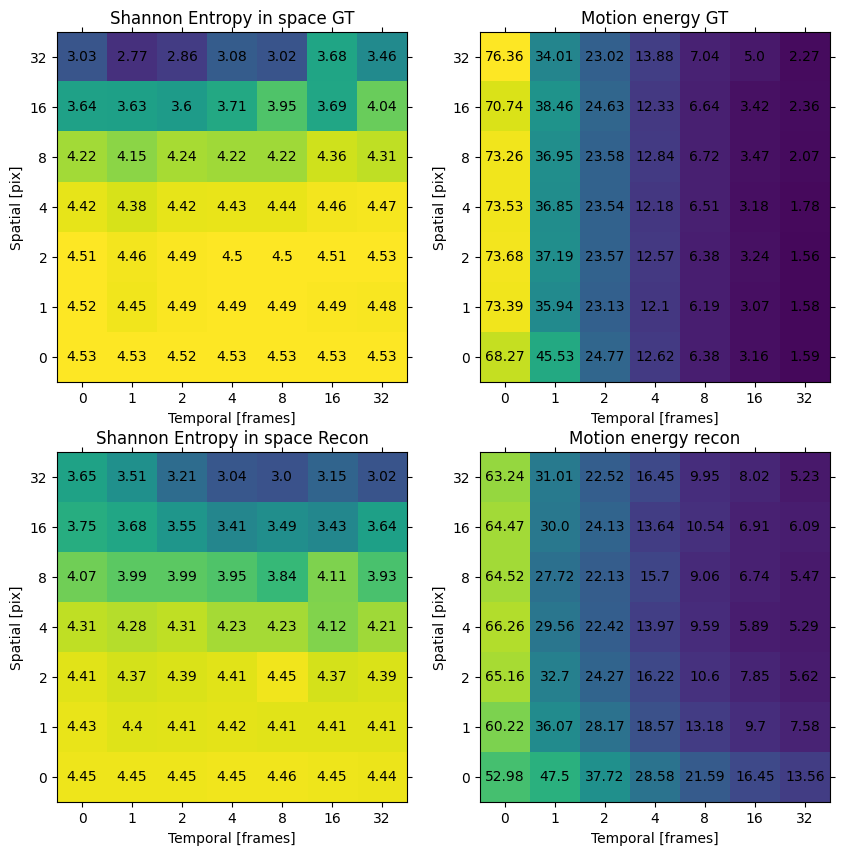

In [35]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(Entropy_in_space_gt.mean(axis=(0,1)), cmap='viridis', vmin=2.5, vmax=4.5)
ax[0,0].invert_yaxis()
ax[0,0].set_xticks(np.arange(7), ['0','1','2','4','8','16','32'])
ax[0,0].set_yticks(np.arange(7), ['0','1','2','4','8','16','32'])
ax[0,0].set_xlabel('Temporal [frames]')
ax[0,0].set_ylabel('Spatial [pix]')
#set axis square
ax[0,0].set_box_aspect(1)
ax[0,0].tick_params(bottom=True, top=True, left=True, right=True)
for i in range(7):
    for j in range(7):
        c = Entropy_in_space_gt.mean(axis=(0,1))[j,i]
        ax[0,0].text(i, j, str(round(c, 2)), 
                 va='center', ha='center')
ax[0,0].set_title('Shannon Entropy in space GT')

ax[0,1].imshow(Motion_energy_gt.mean(axis=(0,1)), cmap='viridis', vmin=0, vmax=75)
ax[0,1].invert_yaxis()
ax[0,1].set_xticks(np.arange(7), ['0','1','2','4','8','16','32'])
ax[0,1].set_yticks(np.arange(7), ['0','1','2','4','8','16','32'])
ax[0,1].set_xlabel('Temporal [frames]')
ax[0,1].set_ylabel('Spatial [pix]')
#set axis square
ax[0,1].set_box_aspect(1)
ax[0,1].tick_params(bottom=True, top=True, left=True, right=True)
for i in range(7):
    for j in range(7):
        c = Motion_energy_gt.mean(axis=(0,1))[j,i]
        ax[0,1].text(i, j, str(round(c, 2)), 
                 va='center', ha='center')
ax[0,1].set_title('Motion energy GT')

ax[1,0].imshow(Entropy_in_space_recon.mean(axis=(0,1)), cmap='viridis', vmin=2.5, vmax=4.5)
ax[1,0].invert_yaxis()
ax[1,0].set_xticks(np.arange(7), ['0','1','2','4','8','16','32'])
ax[1,0].set_yticks(np.arange(7), ['0','1','2','4','8','16','32'])
ax[1,0].set_xlabel('Temporal [frames]')
ax[1,0].set_ylabel('Spatial [pix]')
#se axis square
ax[1,0].set_box_aspect(1)
ax[1,0].tick_params(bottom=True, top=True, left=True, right=True)
for i in range(7):
    for j in range(7):
        c = Entropy_in_space_recon.mean(axis=(0,1))[j,i]
        ax[1,0].text(i, j, str(round(c, 2)), 
                 va='center', ha='center')
ax[1,0].set_title('Shannon Entropy in space Recon')

ax[1,1].imshow(Motion_energy_recon.mean(axis=(0,1)), vmin=0, vmax=75)
ax[1,1].invert_yaxis()
ax[1,1].set_xticks(np.arange(7), ['0','1','2','4','8','16','32'])
ax[1,1].set_yticks(np.arange(7), ['0','1','2','4','8','16','32'])
ax[1,1].set_xlabel('Temporal [frames]')
ax[1,1].set_ylabel('Spatial [pix]')
#set axis square
ax[1,1].set_box_aspect(1)
ax[1,1].tick_params(bottom=True, top=True, left=True, right=True)
for i in range(7):
    for j in range(7):
        c = Motion_energy_recon.mean(axis=(0,1))[j,i]
        ax[1,1].text(i, j, str(round(c, 2)), 
                 va='center', ha='center')
ax[1,1].set_title('Motion energy recon')

fig.savefig('../reconstructions/Gaussian_noise_entropy.svg', format='svg', dpi=1200)


# Phase inverted stimuli

In [12]:
all_corr_same_phase = np.zeros((len(mice),len(reps),len(spatial_length_constant),len(temporal_length_constant)))
all_corr_opposite_phase = np.zeros((len(mice),len(reps),len(spatial_length_constant),len(temporal_length_constant)))
all_corr_opposite_phase_recontorecon = np.zeros((len(mice),len(reps),len(spatial_length_constant),len(temporal_length_constant)))

for mouse in mice:
    for rep in range(0,len(reps)):
        if rep > len(reps)//2-1:  # phase 2
            rep_opposite_phase = rep - len(reps)//2
        elif rep <= len(reps)//2-1: # phase 1
            rep_opposite_phase = rep + len(reps)//2
            
        for spatial_n in spatial_length_constant:
            for temporal_n in temporal_length_constant:
                all_corr_same_phase[mouse-1,rep,spatial_n,temporal_n] = imsim.reconstruction_video_corr(video_gt[mouse-1,rep,spatial_n,temporal_n],
                                                                                           video_pred_Amean_all[mouse-1,rep,spatial_n,temporal_n],
                                                                                           np.where(mask[mouse-1] >= mask_th,1,0))
                all_corr_opposite_phase[mouse-1,rep,spatial_n,temporal_n] = imsim.reconstruction_video_corr(video_gt[mouse-1,rep_opposite_phase,spatial_n,temporal_n],
                                                                                           video_pred_Amean_all[mouse-1,rep,spatial_n,temporal_n],
                                                                                           np.where(mask[mouse-1] >= mask_th,1,0))
                
                all_corr_opposite_phase_recontorecon[mouse-1,rep,spatial_n,temporal_n] = imsim.reconstruction_video_corr(video_pred_Amean_all[mouse-1,rep_opposite_phase,spatial_n,temporal_n],
                                                                                           video_pred_Amean_all[mouse-1,rep,spatial_n,temporal_n],
                                                                                           np.where(mask[mouse-1] >= mask_th,1,0))

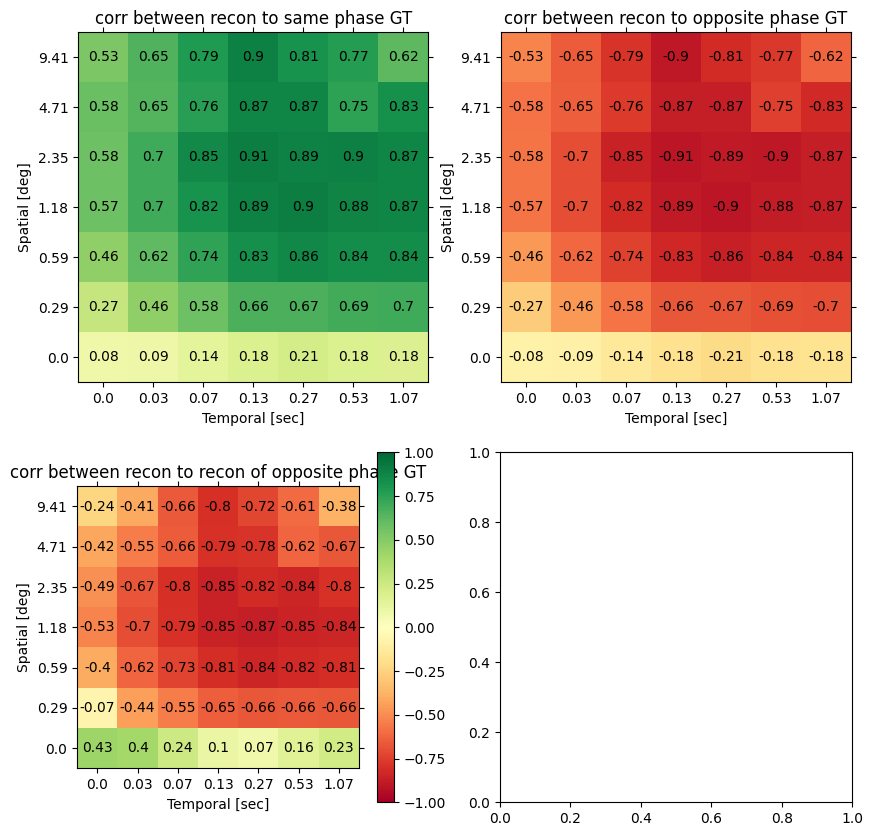

In [13]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(all_corr_same_phase.mean(axis=(0,1)), cmap='RdYlGn', vmin=-1, vmax=1)
ax[0,0].invert_yaxis()
ax[0,0].set_xticks(np.arange(7), np.array([0,1,2,4,8,16,32]).__mul__(1/30).round(2).astype(str))
ax[0,0].set_yticks(np.arange(7), np.array([0,1,2,4,8,16,32]).__mul__(1/3.4).round(2).astype(str))
ax[0,0].set_xlabel('Temporal [sec]')
ax[0,0].set_ylabel('Spatial [deg]')
ax[0,0].set_title('corr between recon to same phase GT')
ax[0,0].tick_params(bottom=True, top=True, left=True, right=True)
for i in range(7):
    for j in range(7):
        c = all_corr_same_phase.mean(axis=(0,1))[j,i]
        ax[0,0].text(i, j, str(round(c, 2)), 
                 va='center', ha='center')


ax[0,1].imshow(all_corr_opposite_phase.mean(axis=(0,1)), cmap='RdYlGn', vmin=-1, vmax=1)
ax[0,1].invert_yaxis()
ax[0,1].set_xticks(np.arange(7), np.array([0,1,2,4,8,16,32]).__mul__(1/30).round(2).astype(str))
ax[0,1].set_yticks(np.arange(7), np.array([0,1,2,4,8,16,32]).__mul__(1/3.4).round(2).astype(str))
ax[0,1].set_xlabel('Temporal [sec]')
ax[0,1].set_ylabel('Spatial [deg]')
ax[0,1].set_title('corr between recon to opposite phase GT')
ax[0,1].tick_params(bottom=True, top=True, left=True, right=True)
for i in range(7):
    for j in range(7):
        c = all_corr_opposite_phase.mean(axis=(0,1))[j,i]
        ax[0,1].text(i, j, str(round(c, 2)), 
                 va='center', ha='center')
        
        
ax[1,0].imshow(all_corr_opposite_phase_recontorecon.mean(axis=(0,1)), cmap='RdYlGn', vmin=-1, vmax=1)
ax[1,0].invert_yaxis()
ax[1,0].set_xticks(np.arange(7), np.array([0,1,2,4,8,16,32]).__mul__(1/30).round(2).astype(str))
ax[1,0].set_yticks(np.arange(7), np.array([0,1,2,4,8,16,32]).__mul__(1/3.4).round(2).astype(str))
ax[1,0].set_xlabel('Temporal [sec]')
ax[1,0].set_ylabel('Spatial [deg]')
ax[1,0].set_title('corr between recon to recon of opposite phase GT') 
ax[1,0].tick_params(bottom=True, top=True, left=True, right=True)
for i in range(7):
    for j in range(7):
        c = all_corr_opposite_phase_recontorecon.mean(axis=(0,1))[j,i]
        ax[1,0].text(i, j, str(round(c, 2)), 
                 va='center', ha='center')



cbar1 = plt.colorbar(ax[1,0].images[0], ax=ax[1,0], orientation='vertical')

fig.savefig('../reconstructions/Gaussian_noise_PhaseInversion.svg', format='svg', dpi=1200)

